Loaded the libraries

In [75]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Loaded the Data

In [76]:
df = pd.read_excel("avocado_ripeness_dataset.xlsx")

Exploring the Data

In [77]:
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [78]:
df.tail()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned
249,17.8,27,30,36,black,40,190,272,ripe


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [80]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


Checking the distribution of the each variables

c:\Users\arvee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arvee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arvee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arvee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

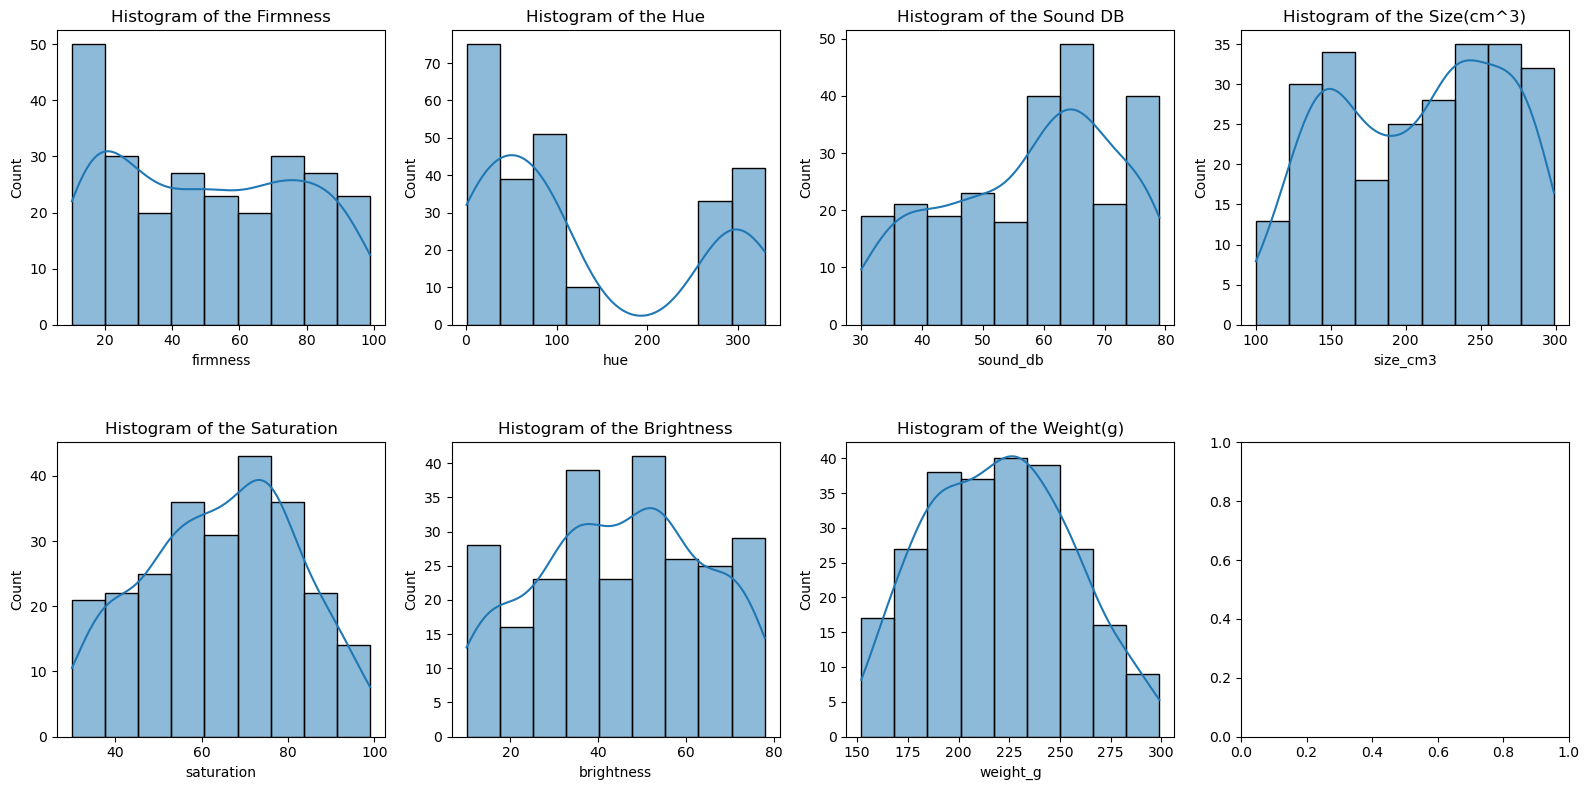

In [81]:
fig, axes= plt.subplots(2,4, figsize=(16,8))
#Firmness Distribution
sns.histplot(data=df, x="firmness", kde=True, ax=axes[0,0])
axes[0,0].set_title("Histogram of the Firmness")

sns.histplot(data=df,x="hue",kde=True,ax=axes[0,1])
axes[0,1].set_title("Histogram of the Hue")

sns.histplot(data=df, x="saturation",kde=True, ax=axes[1,0])
axes[1,0].set_title("Histogram of the Saturation")

sns.histplot(data=df,x="brightness",kde=True, ax=axes[1,1])
axes[1,1].set_title("Histogram of the Brightness")

sns.histplot(data=df,x="sound_db", kde=True, ax=axes[0,2])
axes[0,2].set_title("Histogram of the Sound DB")

sns.histplot(data=df,x="weight_g", kde=True, ax=axes[1,2])
axes[1,2].set_title("Histogram of the Weight(g)")

sns.histplot(data=df,x="size_cm3",kde=True, ax=axes[0,3])
axes[0,3].set_title("Histogram of the Size(cm^3)")

#Pad controls distance from the plot
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)


Since color_category and ripeness are object, we would like to see the frequency on each category.

In [82]:
df["color_category"].value_counts()

color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64

In [83]:
df["ripeness"].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

Checking if there are any missing values

In [84]:
df.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

### Random Forest Classifier

Data Splitting 

In [85]:
X =df.drop(columns=["ripeness"])
y= df["ripeness"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

Data Processing

In [87]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(),['firmness','hue','saturation','brightness','sound_db','weight_g',"size_cm3"]),
    ('cat', OneHotEncoder(),["color_category"])
])

Pipelining

In [89]:
pipe= Pipeline([
    ('preprocess', preprocessor),
    ('clf',RandomForestClassifier(random_state=42))
])

Grid Search

In [97]:
param_grid = {
    'clf__n_estimators':[50,100],
    'clf__max_depth':[None,5,10],
    'clf__min_samples_split':[2,5],
    'clf__min_samples_leaf':[1,2]
}

In [98]:
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['firmness',
                                                                          'hue',
                                                                          'saturation',
                                                                          'brightness',
                                                                          'sound_db',
                                                                          'weight_g',
                                                                          'size_cm3']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['color_category'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__min_samples_leaf': [1, 2],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [50, 100]},
             scoring='accuracy')

Results

In [99]:
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# External Validation
print("Test Accuracy", grid.score(X_test, y_test))

Best Params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Best CV Score: 1.0
Test Accuracy 1.0


In [100]:
y_pred = grid.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,y_pred))

print("Confusion Matrix:")
cm= confusion_matrix(y_test,y_pred)
print(cm)

Classification Report:
                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        10
      firm-ripe       1.00      1.00      1.00        10
           hard       1.00      1.00      1.00        10
pre-conditioned       1.00      1.00      1.00        10
           ripe       1.00      1.00      1.00        10

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


For K-NN Classfier

In [109]:
pipeknn = Pipeline([
    ('preprocess', preprocessor),
    ('clf', KNeighborsClassifier())
])

In [110]:
param_gridknn = {
    "clf__n_neighbors": list(range(1, 25)),
    "clf__weights": ["distance"],
    "clf__metric": ["euclidean"]
}

In [111]:
gridknn = GridSearchCV(pipeknn, param_gridknn, cv=10, scoring='accuracy', n_jobs=-1)
gridknn.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['firmness',
                                                                          'hue',
                                                                          'saturation',
                                                                          'brightness',
                                                                          'sound_db',
                                                                          'weight_g',
                                                                          'size_cm3']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['color_category'])])),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__metric': ['euclidean'],
                         'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24],
                         'clf__weights': ['distance']},
             scoring='accuracy')

Results

In [116]:
print("Best Params:", gridknn.best_params_)
print("Best CV Score:", gridknn.best_score_)

#External Validation
print("Test Accuracy", gridknn.score(X_test, y_test))

Best Params: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'distance'}
Best CV Score: 0.9949999999999999
Test Accuracy 0.98


In [117]:
y_predknn =gridknn.predict(X_test)

print("Classification Report:")
print(classification_report(y_predknn, y_test))

print("Confusion Matrix:")
cmknn = confusion_matrix(y_test,y_predknn)
print(cm)

Classification Report:
                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        10
      firm-ripe       0.90      1.00      0.95         9
           hard       1.00      1.00      1.00        10
pre-conditioned       1.00      1.00      1.00        10
           ripe       1.00      0.91      0.95        11

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


Summary and Conclusion

The Random Forest Classifier achieved an accuracy of 1.000 (100%) during cross-validation and maintained a test accuracy of 1.000, indicating perfect performance in classifying the ripeness of avocados. This suggests that the model was able to fully capture the underlying patterns in the data without overfitting, likely due to its ability to handle both numerical and categorical features effectively while managing feature interactions and noise.

On the other hand, the k-Nearest Neighbors (k-NN) classifier yielded a cross-validation accuracy of 0.994 and a test accuracy of 0.980. While slightly lower than Random Forest, k-NN still demonstrated strong generalization ability, misclassifying only a small fraction of samples. This performance confirms that the dataset is highly predictive and that the ripeness of avocados can be accurately inferred using the available features.

Conclusion:
Among the two models evaluated, the Random Forest Classifier provided the most accurate and consistent performance, making it the most suitable algorithm for classifying avocado ripeness in this study.